# Интернет-магазин "Стримчик"

## Описание проекта

Интернет-магазин «Стримчик» продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

**Цель:** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных games.csv

- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы долларов)
- **EU_sales** — продажи в Европе (миллионы долларов)
- **JP_sales** — продажи в Японии (миллионы долларов)
- **Other_sales** — продажи в других странах (миллионы долларов)
- **Critic_Score** — оценка критиков (от 0 до 100)
- **User_Score** — оценка пользователей (от 0 до 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

## Подготовка данных

In [249]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [250]:
# Читаем датасет из файла games.csv
df = pd.read_csv('games.csv')

In [251]:
# Предварительное знакомство с данными
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Предварительный анализ показал, что в данных есть пропущенные значения. В названиях колонок есть символы в верхнем регистре (требуется привести к нижнему регистру). Можно заподозрить, что год релиза записан в формате float, что тоже может потребовать приведения к верному формату. 

In [252]:
# Получаем предварительную информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


В датасете 11 колонок и 16715 строк. Из них 5 колонок имеют строковый формат и 6 числовой.
Как и предполагалось, в датасете есть пропущенные значения (разное количество значений в разных колонках), а год записан в формате float64. Кроме того, колонка user_score имеет строковый формат object, а должен быть числовой float64. 

In [253]:
# Переводим названия колонок в нижний регистр
df.set_axis(['name','platform','year_of_release','genre','na_sales',
             'eu_sales','jp_sales','other_sales','critic_score','user_score','rating'], 
            axis = 'columns', inplace = True) 
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [254]:
# Переводим колонку user_score в числовой формат
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
#df['year_of_release'] = df['year_of_release'].fillna(0)
#df['year_of_release'] = df['year_of_release'].astype(int, errors='ignore')
#df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

В данном случае пропуски не требуют обработки, так как автоматически заменяются на NaN при считывании датафрейма из файла с помощью df = pd.read_csv('games.csv'): параметр keep_default_na, отвечающий за замену пропусков на NaN по умолчанию равен True.

Наибольшее количество пропусков наблюдается в трех последних столбцах - рейтинг и оценки. Очевидно, эти данные по каким-то причинам не внесены или не известны. Изначально удалять строки с пропусками в колонках оценок нет смысла - можем потерять ценную информацию по другим колонкам. Строки с пропусками можно будет удалить позже - по мене необходимости.

В колонке с пользовательской оценкой user_score встречается тип оценки "tbd", что, очевидно, означает to be done. Вероятно, эти игры только планируется оценить. Значения tbd были изменены на NaN при переводе колонки в числовой формат (параметр errors = 'coerce'), так как, по сути, это то же самое, что и отсутствие оценки.

Пыталась также перевести колонку year_of_release в формат даты. Но отказалась от этой идеи. Выполнение команды

> df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

выдает результат в формате 2010-01-01, а вариант

> df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year 

возвращает данные в формат float64 - т.е., год все равно отображается в виде 2010.0.

Как вариант, можно было попробовать заменить формат на int, но для этого пропущенные значения пришлось бы предварительно заполнить, например, нулями. В итоге решила, что для нашей задачи формат года не столь важен и оставила в исходном варианте.

In [255]:
# Суммарные продажи по всем регионам, total_sales
df['total_sales'] = df.loc[:,['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы

In [256]:
# Посмотрим, сколько игр выпускалось в разные годы
df.groupby('year_of_release')['name'].count().reset_index(drop=False)

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


Заметный рост количества выпускаемых игр начался с 1994 года. С 2009 года количество выпускаемых игр начинает уменьшаться. При этом в 2012 году наблюдается резкий спад - количество выпускаемых игр уменьшается почти в 2 раза по сравнению с предыдущим годом. В последующие годы никаких существенных трендов не наблюдается - количество выпускаемых игр колеблется в диапазоне около 500 - 600 игр в год. 

In [257]:
# Платформы с наибольшими суммарными продажами
platform_sales = (df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
                  .reset_index(drop=False))
platform_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [258]:
# Для дальнейшего анализа берем первые 6 платформ. Так как дальше суммарные продажи резко падают.
top6_platform = (df.groupby('platform')['total_sales'].sum().
                  sort_values(ascending=False).head(6).reset_index(drop=False))
top6_platform

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86


In [259]:
# Для выбранных топ-6 платформ построим распределение суммарных продаж по годам
top6_pivot = (df[df['platform'].isin(top6_platform.loc[:,'platform'])]
              .groupby(['year_of_release','platform'],as_index = False)['total_sales']
              .sum().pivot('year_of_release','platform'))
top6_pivot

total_sales                                        
platform                 DS      PS     PS2     PS3     Wii    X360
year_of_release                                                    
1985.0                 0.02     NaN     NaN     NaN     NaN     NaN
1994.0                  NaN    6.03     NaN     NaN     NaN     NaN
1995.0                  NaN   35.96     NaN     NaN     NaN     NaN
1996.0                  NaN   94.70     NaN     NaN     NaN     NaN
1997.0                  NaN  136.17     NaN     NaN     NaN     NaN
1998.0                  NaN  169.49     NaN     NaN     NaN     NaN
1999.0                  NaN  144.53     NaN     NaN     NaN     NaN
2000.0                  NaN   96.37   39.17     NaN     NaN     NaN
2001.0                  NaN   35.59  166.43     NaN     NaN     NaN
2002.0                  NaN    6.67  205.38     NaN     NaN     NaN
2003.0                  NaN    2.07  184.31     NaN     NaN     NaN
2004.0                17.27     NaN  211.81     NaN     NaN     NaN
2005.0               130.14     NaN  160.66     NaN     NaN    8.25
2006.0               119.81     NaN  103.42   20.96  137.15   51.62
2007.0               146.94     NaN   75.99   73.19  152.77   95.41
2008.0               145.31     NaN   53.90  118.52  171.32  135.26
2009.0               119.54     NaN   26.40  130.93  206.97  120.29
2010.0                85.02     NaN    5.64  142.17  127.95  170.03
2011.0                26.18     NaN    0.45  156.78   59.65  143.84
2012.0                11.01     NaN     NaN  107.36   21.71   99.74
2013.0                 1.54     NaN     NaN  113.25    8.59   88.58
2014.0                  NaN     NaN     NaN   47.76    3.75   34.74
2015.0                  NaN     NaN     NaN   16.82    1.14   11.96
2016.0                  NaN     NaN     NaN    3.60    0.18    1.52

Из таблицы видно, что у ранее популярных платформ DS, PS, PS2 сегодня нулевые продажи. Среднее "время жизни" популярной платформы на рынке - около 10 лет.

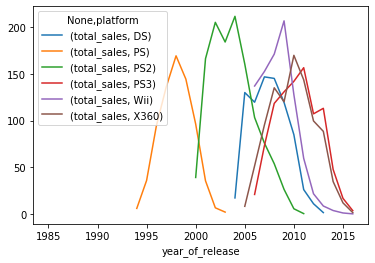

In [260]:
top6_pivot.plot()
plt.show()

Исходя из графика, исключаем из дальнейшего анализа платформы PS и PS2, и берем годы 2006-2011. В эти годы все оставшиеся топ-4 платформы демонстрируют хорошие продажи. Интересный факт: ранее мы установили, что на эти годы приходится максимальное количество выпущенных игр. 

In [261]:
# Рейтинг платформ с наибольшими суммарными продажами с 2006 по 2011 год
top_platforms_0611 = (df[(df['year_of_release'] >= 2006.0) & (df['year_of_release'] <= 2011.0) &
                         (df['platform'].isin(['DS','PS3','Wii','X360']))]
                      .groupby('platform')['total_sales'].sum().sort_values(ascending=False)
                      .reset_index(drop=False))
top_platforms_0611

,platform,total_sales
0,Wii,855.81
1,X360,716.45
2,DS,642.80
3,PS3,642.55


In [262]:
# Построим сводную таблицу суммарных продаж для выбранных платформ за 2006-2011 годы
top_platforms_0611_pivot = (df[(df['year_of_release'] >= 2006.0) & (df['year_of_release'] <= 2011.0) & 
                               (df['platform'].isin(['DS','PS3','Wii','X360']))]
                            .groupby(['year_of_release','platform'],as_index = False)['total_sales']
                            .sum().pivot('year_of_release','platform'))
top_platforms_0611_pivot

total_sales                        
platform                 DS     PS3     Wii    X360
year_of_release                                    
2006.0               119.81   20.96  137.15   51.62
2007.0               146.94   73.19  152.77   95.41
2008.0               145.31  118.52  171.32  135.26
2009.0               119.54  130.93  206.97  120.29
2010.0                85.02  142.17  127.95  170.03
2011.0                26.18  156.78   59.65  143.84

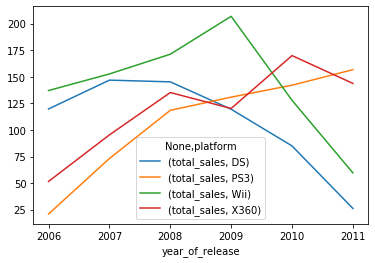

In [263]:
# Отобразим сводную таблицу в виде графика
top_platforms_0611_pivot.plot()
plt.show()

Из графика видно, что продажи PS3 и X360 растут (небольшой спад продаж X360 наблюдался в 2009 году), а продажи Wii и DS падают. Таким образом, потенциально прибыльными платформами являются PS3 и X360.

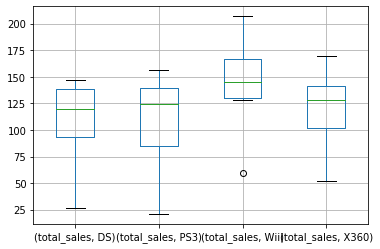

In [264]:
# Построим "ящик с усами" для выбранных платформ
top_platforms_0611_pivot.boxplot()
plt.show()

Большой диапазон продаж наблюдается у платформ DS, PS3, X360. У этих же платформ наблюдается скошенность влево. У Wii данные распределены более компактно, за исключением единичного выброса. Наблюдается скошенность данных вправо. Разница в средних продажах на разных платформах невелика, хотя здесь также в большую сторону выделяется платформа Wii.

Посмотрим, как влияют на продажи внутри популярной платформы Х360 отзывы пользователей и критиков.

In [265]:
# Выберем из общей таблицы данные, относящиеся к платформе X360
sales_x360 = (df[(df['year_of_release'] >= 2006.0) & (df['year_of_release'] <= 2011.0) &
                             (df['platform'] == 'X360')])
sales_x360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.47
44,Halo 3,X360,2007.0,Shooter,7.97,2.81,0.13,1.21,94.0,7.8,M,12.12


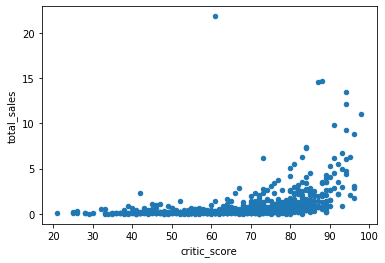

In [266]:
# Диаграмма рассеяния "отзывы критиков - суммарные продажи" 
sales_x360.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()

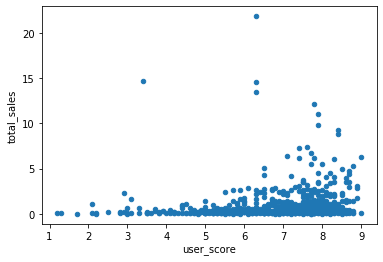

In [267]:
# Диаграмма рассеяния "отзывы пользователей - суммарные продажи" 
sales_x360.plot(x='user_score',y='total_sales', kind='scatter')
plt.show()

In [268]:
# Чтобы посчитать корреляцию, удаляем пропущенные значения из колонок с оценками пользователей 
# и критиков
sales_x360.dropna(subset=['user_score', 'critic_score']) 
sales_x360.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,0.002769,0.047485,-0.047890,0.007329,-0.044601,-0.120429,0.014958
na_sales,0.002769,1.000000,0.869704,0.511489,0.964612,0.388761,0.143794,0.986640
eu_sales,0.047485,0.869704,1.000000,0.506381,0.956852,0.406063,0.166853,0.938000
jp_sales,-0.047890,0.511489,0.506381,1.000000,0.529475,0.302521,0.193166,0.537662
other_sales,0.007329,0.964612,0.956852,0.529475,1.000000,0.417585,0.167788,0.991627
critic_score,-0.044601,0.388761,0.406063,0.302521,0.417585,1.000000,0.658282,0.406246
user_score,-0.120429,0.143794,0.166853,0.193166,0.167788,0.658282,1.000000,0.157359
total_sales,0.014958,0.986640,0.938000,0.537662,0.991627,0.406246,0.157359,1.000000


Из таблицы видно, что оценки критиков больше влияют на суммарные продажи, чем оценки пользователей.
*Примечание:* на обеих диаграммах рассеяния есть вылетающие точки при значениях total_sales > 12. Для более точного расчета коэффициента корреляции можно было бы убрать эти точки. Тогда коэффициенты корреляции "оценка критиков - суммарные продажи" составит 0.49, "оценка пользователея - суммарные продажи" - 0.26. Но для качественного сравнения это не принципиально. 

Посмотрим, как влияют на продажи отзывы пользователей и критиков для оставшихся трех платформ: PS3, Wii, DS

In [269]:
# Выберем из общей таблицы данные, относящиеся к платформе PS3
sales_ps3 = (df[(df['year_of_release'] >= 2006.0) & (df['year_of_release'] <= 2011.0) &
                             (df['platform'] == 'PS3')])
sales_ps3.dropna(subset=['user_score', 'critic_score']) 
sales_ps3.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.044580,-0.011707,0.056435,-0.036272,-0.042776,-0.013684,-0.024581
na_sales,-0.044580,1.000000,0.814939,0.347759,0.883166,0.502844,0.217175,0.944073
eu_sales,-0.011707,0.814939,1.000000,0.381873,0.968013,0.439271,0.182636,0.951954
jp_sales,0.056435,0.347759,0.381873,1.000000,0.384539,0.209319,0.179610,0.467319
other_sales,-0.036272,0.883166,0.968013,0.384539,1.000000,0.461916,0.209656,0.974844
critic_score,-0.042776,0.502844,0.439271,0.209319,0.461916,1.000000,0.672801,0.489197
user_score,-0.013684,0.217175,0.182636,0.179610,0.209656,0.672801,1.000000,0.219025
total_sales,-0.024581,0.944073,0.951954,0.467319,0.974844,0.489197,0.219025,1.000000


In [270]:
# Выберем из общей таблицы данные, относящиеся к платформе PS3
sales_wii = (df[(df['year_of_release'] >= 2006.0) & (df['year_of_release'] <= 2011.0) &
                             (df['platform'] == 'Wii')])
sales_wii.dropna(subset=['user_score', 'critic_score']) 
sales_wii.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.095830,-0.079357,-0.062182,-0.091405,0.110866,0.094665,-0.088848
na_sales,-0.095830,1.000000,0.972331,0.782432,0.988674,0.176629,0.112085,0.992893
eu_sales,-0.079357,0.972331,1.000000,0.787066,0.992815,0.163903,0.105273,0.989754
jp_sales,-0.062182,0.782432,0.787066,1.000000,0.779956,0.198826,0.127247,0.823638
other_sales,-0.091405,0.988674,0.992815,0.779956,1.000000,0.161957,0.103861,0.995272
critic_score,0.110866,0.176629,0.163903,0.198826,0.161957,1.000000,0.689563,0.176800
user_score,0.094665,0.112085,0.105273,0.127247,0.103861,0.689563,1.000000,0.112853
total_sales,-0.088848,0.992893,0.989754,0.823638,0.995272,0.176800,0.112853,1.000000


In [271]:
# Выберем из общей таблицы данные, относящиеся к платформе DS
sales_ds = (df[(df['year_of_release'] >= 2006.0) & (df['year_of_release'] <= 2011.0) &
                             (df['platform'] == 'DS')])
sales_ds.dropna(subset=['user_score', 'critic_score']) 
sales_ds.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.090856,-0.056849,-0.083820,-0.075659,0.057558,0.058419,-0.086106
na_sales,-0.090856,1.000000,0.852238,0.662197,0.936846,0.204246,0.074148,0.943741
eu_sales,-0.056849,0.852238,1.000000,0.656995,0.966538,0.189679,0.095933,0.929995
jp_sales,-0.083820,0.662197,0.656995,1.000000,0.677210,0.263899,0.187257,0.832694
other_sales,-0.075659,0.936846,0.966538,0.677210,1.000000,0.190198,0.089795,0.962960
critic_score,0.057558,0.204246,0.189679,0.263899,0.190198,1.000000,0.642832,0.232605
user_score,0.058419,0.074148,0.095933,0.187257,0.089795,0.642832,1.000000,0.119959
total_sales,-0.086106,0.943741,0.929995,0.832694,0.962960,0.232605,0.119959,1.000000


*Вывод:* у набирающих популярность платформ X360 и PS3 прослеживается бОльшая корреляция продаж от оценок пользователей и критиков, чем у теряющих популярность платформ Wii и DS. При этом у всех четырех платформ оценки критиков больше коррелируют с суммарными продажами, чем оценки пользователей. Таким образом, при запуске нового продукта следует обращать внимание на оценку критиков.

In [272]:
# Общее распределение игр по жанрам
genre_sales = (df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
               .reset_index(drop=False))
genre_sales

,genre,total_sales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


Таким образом, топ-3 популярных жанров - Action, Sports, Shooter. Топ-3 аутсайдеров - Puzzle, Adventure, Strategy. Разница продаж между самым популярным и самым маловостребованным жанром составляет 10 раз.

### Портрет пользователя по регионам ###

#### Сравнение популярности платформ по регионам  ####

In [273]:
# Самые популярные платформы в Северной Америке
top5_platform_na = (df.groupby('platform')['na_sales'].sum().
                  sort_values(ascending=False).head(5).reset_index(drop=False))
top5_platform_na = top5_platform_na.merge(platform_sales,on='platform',how='left')
top5_platform_na['na_in_total_sales,%'] = (round((top5_platform_na['na_sales'] 
                                                  / top5_platform_na['total_sales'])*100))
top5_platform_na = top5_platform_na.drop('total_sales', axis=1)
top5_platform_na

,platform,na_sales,"na_in_total_sales,%"
0,X360,602.47,62.0
1,PS2,583.84,46.0
2,Wii,496.90,55.0
3,PS3,393.49,42.0
4,DS,382.40,47.0


In [274]:
# Самые популярные платформы в Европе
top5_platform_eu = (df.groupby('platform')['eu_sales'].sum().
                  sort_values(ascending=False).head(5).reset_index(drop=False))
top5_platform_eu = top5_platform_eu.merge(platform_sales,on='platform',how='left')
top5_platform_eu['eu_in_total_sales,%'] = (round((top5_platform_eu['eu_sales'] 
                                                  / top5_platform_eu['total_sales'])*100))
top5_platform_eu = top5_platform_eu.drop('total_sales', axis=1)
top5_platform_eu

,platform,eu_sales,"eu_in_total_sales,%"
0,PS2,339.29,27.0
1,PS3,330.29,35.0
2,X360,270.76,28.0
3,Wii,262.21,29.0
4,PS,213.61,29.0


In [275]:
# Самые популярные платформы в Японии
top5_platform_jp = (df.groupby('platform')['jp_sales'].sum().
                  sort_values(ascending=False).head(5).reset_index(drop=False))
top5_platform_jp = top5_platform_jp.merge(platform_sales,on='platform',how='left')
top5_platform_jp['jp_in_total_sales,%'] = (round((top5_platform_jp['jp_sales'] 
                                                  / top5_platform_jp['total_sales'])*100))
top5_platform_jp = top5_platform_jp.drop('total_sales', axis=1)
top5_platform_jp

,platform,jp_sales,"jp_in_total_sales,%"
0,DS,175.57,22.0
1,PS,139.82,19.0
2,PS2,139.20,11.0
3,SNES,116.55,58.0
4,3DS,100.67,39.0


In [276]:
# Общая таблица популярности платформ по регионам
top5_platform_all = pd.concat([top5_platform_na, top5_platform_eu, top5_platform_jp], axis=1)
top5_platform_all

,platform,na_sales,"na_in_total_sales,%",platform,eu_sales,"eu_in_total_sales,%",platform,jp_sales,"jp_in_total_sales,%"
0,X360,602.47,62.0,PS2,339.29,27.0,DS,175.57,22.0
1,PS2,583.84,46.0,PS3,330.29,35.0,PS,139.82,19.0
2,Wii,496.90,55.0,X360,270.76,28.0,PS2,139.20,11.0
3,PS3,393.49,42.0,Wii,262.21,29.0,SNES,116.55,58.0
4,DS,382.40,47.0,PS,213.61,29.0,3DS,100.67,39.0


**Выводы:**
1. Самые большие продажи - в Северной Америке. Второй по суммарным продажам - рынок Европы. Третий - Японии.
2. Первые 4 позиции в рейтингах по Северной Америке и Европе занимают одни и те же платформы (но на разных местах в рейтинге): PS2, PS3, X360, Wii. Основной вклад в продажи игр на этих платформах дает Северная Америка. На 5 месте в Северной Америке платформа DS, в Европе - платформа PS.
3. В Японии же наоборот, DS и PS занимают ведущие места в рейтинге. На третье место вышла PS2, популярная также на двух других рынках. А на 4 и 5 месте - платформы SNES и 3DS, которые не попали в топ-5 на североамериканском и европейском рынках. Основной вклад в продажи игр на платформе SNES дает Япония.
4. Таким образом, европейские и североамериканские пользователи похожи по предпочтениям платформ. У японских пользователей свои предпочтения

In [277]:
# Самые популярные жанры в Северной Америке
top5_genre_na = (df.groupby('genre')['na_sales'].sum().
                  sort_values(ascending=False).head(5).reset_index(drop=False))
top5_genre_na = top5_genre_na.merge(genre_sales,on='genre',how='left')
top5_genre_na['na_in_total_sales,%'] = (round((top5_genre_na['na_sales'] 
                                                  / top5_genre_na['total_sales'])*100))
top5_genre_na = top5_genre_na.drop('total_sales', axis=1)
top5_genre_na

,genre,na_sales,"na_in_total_sales,%"
0,Action,879.01,50.0
1,Sports,684.43,51.0
2,Shooter,592.24,56.0
3,Platform,445.50,54.0
4,Misc,407.27,51.0


In [278]:
# Самые популярные жанры в Европе
top5_genre_eu = (df.groupby('genre')['eu_sales'].sum().
                  sort_values(ascending=False).head(5).reset_index(drop=False))
top5_genre_eu = top5_genre_eu.merge(genre_sales,on='genre',how='left')
top5_genre_eu['eu_in_total_sales,%'] = (round((top5_genre_eu['eu_sales'] 
                                                  / top5_genre_eu['total_sales'])*100))
top5_genre_eu = top5_genre_eu.drop('total_sales', axis=1)
top5_genre_eu

,genre,eu_sales,"eu_in_total_sales,%"
0,Action,519.13,30.0
1,Sports,376.79,28.0
2,Shooter,317.34,30.0
3,Racing,236.51,32.0
4,Misc,212.74,27.0


In [279]:
# Самые популярные жанры в Японии
top5_genre_jp = (df.groupby('genre')['jp_sales'].sum().
                  sort_values(ascending=False).head(5).reset_index(drop=False))
top5_genre_jp = top5_genre_jp.merge(genre_sales,on='genre',how='left')
top5_genre_jp['jp_in_total_sales,%'] = (round((top5_genre_jp['jp_sales'] 
                                                  / top5_genre_jp['total_sales'])*100))
top5_genre_jp = top5_genre_jp.drop('total_sales', axis=1)
top5_genre_jp

,genre,jp_sales,"jp_in_total_sales,%"
0,Role-Playing,355.41,38.0
1,Action,161.43,9.0
2,Sports,135.54,10.0
3,Platform,130.83,16.0
4,Misc,108.11,13.0


In [280]:
# Общая таблица популярности жанров по регионам
top5_genre_all = pd.concat([top5_genre_na, top5_genre_eu, top5_genre_jp], axis=1)
top5_genre_all

,genre,na_sales,"na_in_total_sales,%",genre,eu_sales,"eu_in_total_sales,%",genre,jp_sales,"jp_in_total_sales,%"
0,Action,879.01,50.0,Action,519.13,30.0,Role-Playing,355.41,38.0
1,Sports,684.43,51.0,Sports,376.79,28.0,Action,161.43,9.0
2,Shooter,592.24,56.0,Shooter,317.34,30.0,Sports,135.54,10.0
3,Platform,445.50,54.0,Racing,236.51,32.0,Platform,130.83,16.0
4,Misc,407.27,51.0,Misc,212.74,27.0,Misc,108.11,13.0


**Выводы:**
1. Основной вклад в продажи в топ-5 жанров дает Северная Америка. 
2. Жанры Action, Sports, Misc популярны во всех трех регионах.
3. Рынки Северной Америки и Европы отличаются только 4 позицией: в Северной Америке это Platform, в Европе - Racing.
4. Жанр Platform востребован в Северной Америке и Японии, жанр Racing - в Европе.
5. В Японии рейтинг возглавляют ролевые игры, тогда как в Северной Америке и Европе этот жанр не вошел в топ-5.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе? ####

In [281]:
# Суммарные продажи в зависимости от рейтинга ESRB в Северной Америке
rating_na = (df.groupby('rating')['na_sales'].sum().
                  sort_values(ascending=False).reset_index(drop=False))
rating_na

,rating,na_sales
0,E,1292.99
1,T,759.75
2,M,748.48
3,E10+,353.32
4,K-A,2.56
5,EC,1.53
6,AO,1.26
7,RP,0.00


In [282]:
# Суммарные продажи в зависимости от рейтинга ESRB в Европе
rating_eu = (df.groupby('rating')['eu_sales'].sum().
                  sort_values(ascending=False).reset_index(drop=False))
rating_eu

,rating,eu_sales
0,E,710.25
1,M,483.97
2,T,427.03
3,E10+,188.52
4,AO,0.61
5,K-A,0.27
6,EC,0.11
7,RP,0.08


In [283]:
# Суммарные продажи в зависимости от рейтинга ESRB в Японии
rating_jp = (df.groupby('rating')['jp_sales'].sum().
                  sort_values(ascending=False).reset_index(drop=False))
rating_jp

,rating,jp_sales
0,E,198.11
1,T,151.40
2,M,64.24
3,E10+,40.20
4,K-A,1.46
5,RP,0.00
6,EC,0.00
7,AO,0.00


In [284]:
# Общая таблица зависимости продаж от рейтинга ESRB по регионам
rating_all = pd.concat([rating_na, rating_eu, rating_jp], axis=1)
rating_all

,rating,na_sales,rating,eu_sales,rating,jp_sales
0,E,1292.99,E,710.25,E,198.11
1,T,759.75,M,483.97,T,151.40
2,M,748.48,T,427.03,M,64.24
3,E10+,353.32,E10+,188.52,E10+,40.20
4,K-A,2.56,AO,0.61,K-A,1.46
5,EC,1.53,K-A,0.27,RP,0.00
6,AO,1.26,EC,0.11,EC,0.00
7,RP,0.00,RP,0.08,AO,0.00


**Вывод:**
Во всех трех регионах популярны игры с рейтингами E, T, M, E10+, и малые продажи у игр с остальными рейтингами. 

## Исследование статистических показателей  ##

In [285]:
# Среднее, дисперсия и стандартное отклонение для пользовательских рейтингов и рейтингов критиков
#по разным жанрам
genre_statistics = genre_sales
for i in genre_sales.index:
    genre_statistics.loc[i,'mean_critic'] = (round(df[df['genre'] == genre_sales.loc[i,'genre']]
                                      ['critic_score'].mean(),1))
    genre_statistics.loc[i,'var_critic'] = (round(df[df['genre'] == genre_sales.loc[i,'genre']]
                                      ['critic_score'].var(ddof=1),1))
    genre_statistics.loc[i,'std_critic'] = (round(df[df['genre'] == genre_sales.loc[i,'genre']]
                                      ['critic_score'].std(),1))
    genre_statistics.loc[i,'mean_user'] = (round(df[df['genre'] == genre_sales.loc[i,'genre']]
                                      ['user_score'].mean(),1))
    genre_statistics.loc[i,'var_user'] = (round(df[df['genre'] == genre_sales.loc[i,'genre']]
                                      ['user_score'].var(ddof=1),1))
    genre_statistics.loc[i,'std_user'] = (round(df[df['genre'] == genre_sales.loc[i,'genre']]
                                      ['user_score'].std(),1))
genre_statistics

,genre,total_sales,mean_critic,var_critic,std_critic,mean_user,var_user,std_user
0,Action,1744.17,66.6,201.8,14.2,7.1,2.0,1.4
1,Sports,1331.27,72.0,192.6,13.9,7.0,2.6,1.6
2,Shooter,1052.45,70.2,211.8,14.6,7.0,2.3,1.5
3,Role-Playing,934.56,72.7,144.0,12.0,7.6,1.2,1.1
4,Platform,827.77,68.1,174.6,13.2,7.3,2.3,1.5
5,Misc,802.51,66.6,200.3,14.2,6.8,2.4,1.5
6,Racing,728.67,68.0,203.0,14.2,7.0,2.4,1.5
7,Fighting,447.53,69.2,203.9,14.3,7.3,2.0,1.4
8,Simulation,389.97,68.6,154.0,12.4,7.1,2.6,1.6
9,Puzzle,242.57,67.4,162.2,12.7,7.2,2.3,1.5


### Жанр Action ###

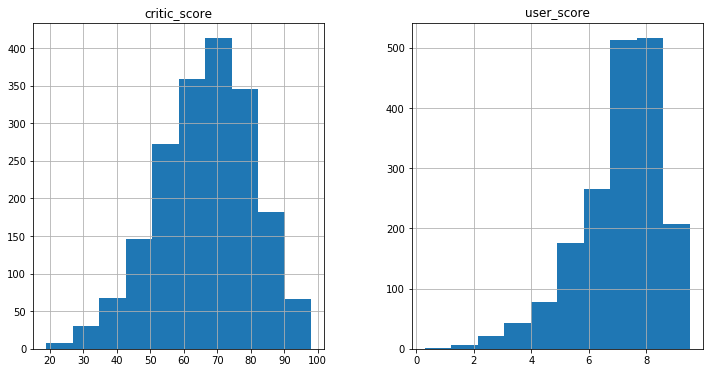

In [286]:
df[df['genre'] == 'Action'].hist(column = ['critic_score','user_score'], figsize=(12, 6))
plt.show()

В пользовательском рейтинге максимальное количество оценок в диапазоне 7-8, присутствует скошенность влево. В рейтинге критиков более равномерное распределение, большинство оценок около 70.

### Жанр Sports ###

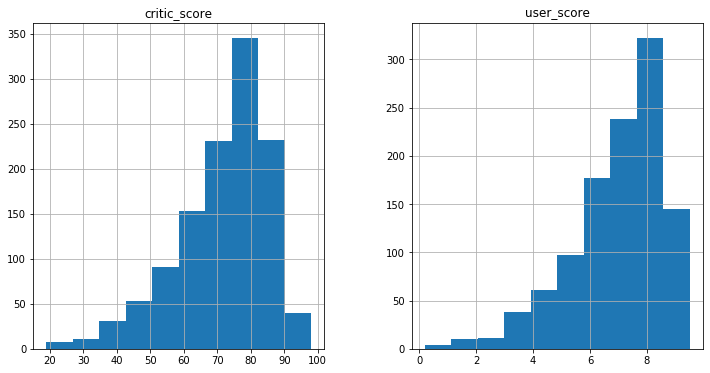

In [287]:
df[df['genre'] == 'Sports'].hist(column = ['critic_score','user_score'], figsize=(12, 6))
plt.show()

Распределение рейтингов и пользователей, и критиков имеет похожую форму. Максимальное количество пользователей поставили оценку около 8, максимальное количество критиков - около 80. В обоих случаях наблюдается скошенность влево.

### Жанр Shooter ###

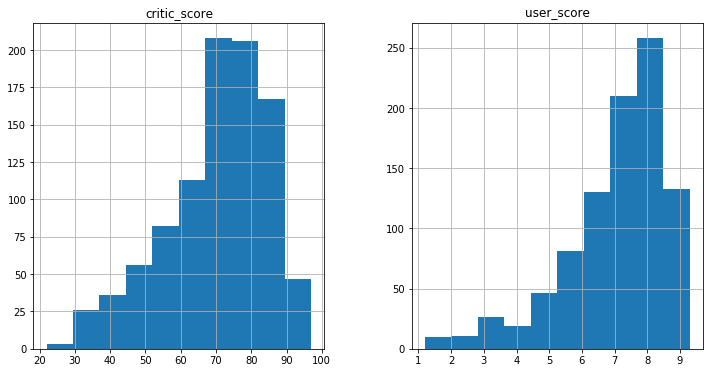

In [288]:
df[df['genre'] == 'Shooter'].hist(column = ['critic_score','user_score'], figsize=(12, 6))
plt.show()

Максимальное количество критиков поставили оценку 70-80, максимальное количество пользователей - около 8. В обоих случаях наблюдается скошенность влево.

### Жанр Role-Playing ###

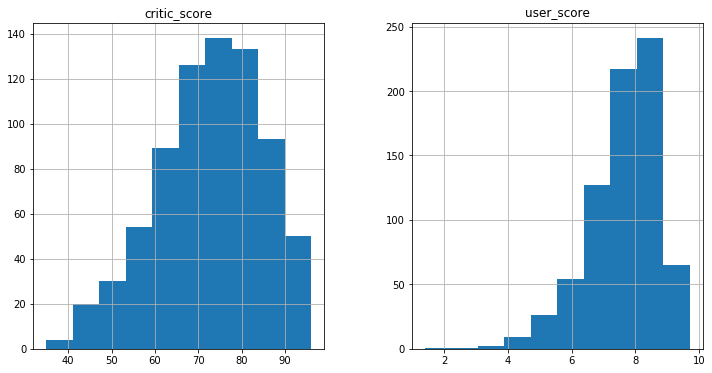

In [289]:
df[df['genre'] == 'Role-Playing'].hist(column = ['critic_score','user_score'], figsize=(12, 6))
plt.show()

Большинство критиков поставили оценку около 70, большинство пользователей в диапазоне 7-9. Распределение оценок критиков более равномерное. В оценках пользователей наблюдается пик в области 7-9, скошенность влево и выбросы в виде низких оценок.

### Жанр Platform ###

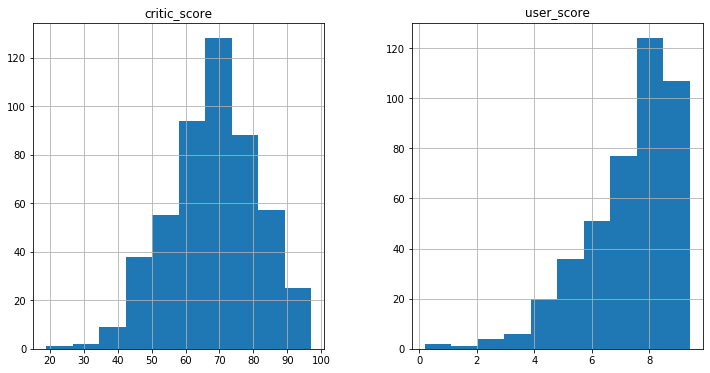

In [290]:
df[df['genre'] == 'Platform'].hist(column = ['critic_score','user_score'], figsize=(12, 6))
plt.show()

Распределение оценок критиков более равномерное, с максимальным количеством оценок около 70. Максимальное количество пользователей поставили оценки около 8, наблюдается сильная скошенность влево.

### Жанр Misc ###

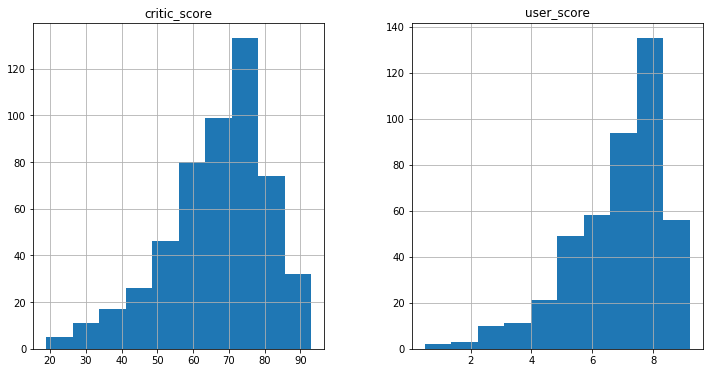

In [291]:
df[df['genre'] == 'Misc'].hist(column = ['critic_score','user_score'], figsize=(12, 6))
plt.show()

Максимальное количество критиков поставили оценки в диапазоне 70-80, максимальное количество пользователей - около 8. Оба распределения похожи по виду и демонстрируют скошенность влево.

### Жанр Racing ###

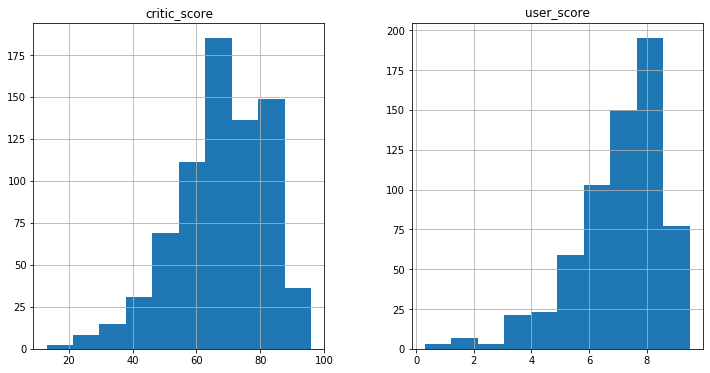

In [292]:
df[df['genre'] == 'Racing'].hist(column = ['critic_score','user_score'], figsize=(12, 6))
plt.show()

Оценки критиков в этом жанре ниже, чем пользователей: 60-70 против 8. Оба графика демонстрируют скошенность влево.

### Жанр Fighting ###

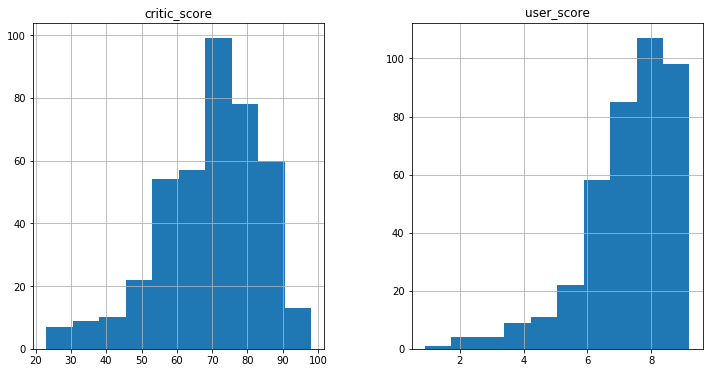

In [293]:
df[df['genre'] == 'Fighting'].hist(column = ['critic_score','user_score'], figsize=(12, 6))
plt.show()

Оценки критиков в этом жанре ниже, чем пользователей: около 70 и около 8 соответственно. Оба графика демонстрируют скошенность влево.

### Жанр Simulation ###

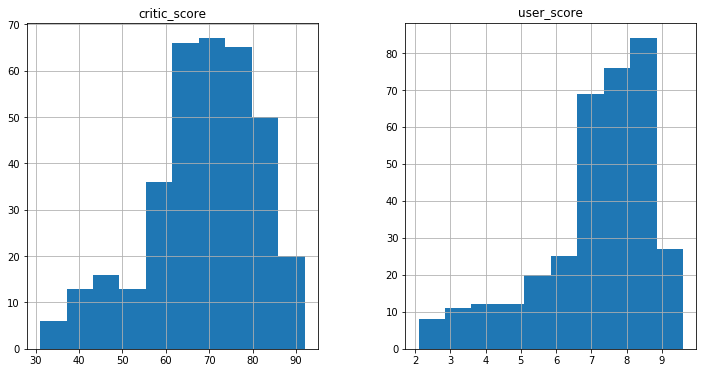

In [294]:
df[df['genre'] == 'Simulation'].hist(column = ['critic_score','user_score'], figsize=(12, 6))
plt.show()

На обоих графиках выделяется интервал оценок в диапазоне около 60-85 и 6.7-8.8 соответственно. Оценок в этих интервалах существенно больше, чем более низких и более высоких. Наблюдается скошенность влево.

### Жанр Puzzle ###

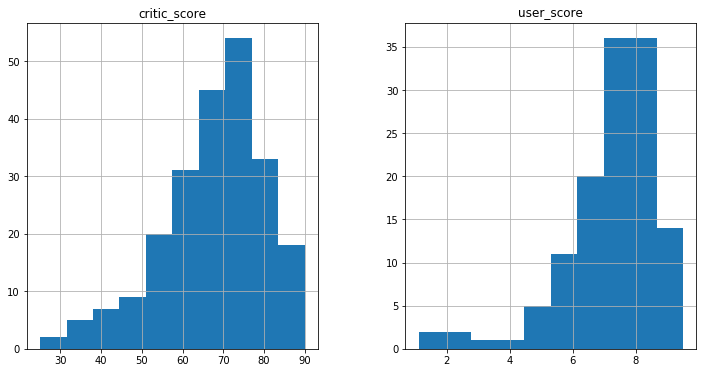

In [295]:
df[df['genre'] == 'Puzzle'].hist(column = ['critic_score','user_score'], figsize=(12, 6))
plt.show()

Оценки критиков в этом жанре немного ниже, чем пользователей: 65-75 против 7-8.5. Оба графика демонстрируют скошенность влево.

### Жанр Adventure ###

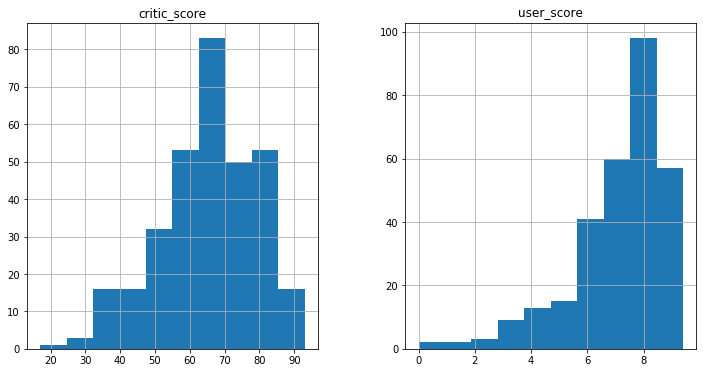

In [296]:
df[df['genre'] == 'Adventure'].hist(column = ['critic_score','user_score'], figsize=(12, 6))
plt.show()

Оценки критиков в этом жанре ниже, чем пользователей: 60-70 против 8. Оба графика демонстрируют скошенность влево.

### Жанр Strategy ###

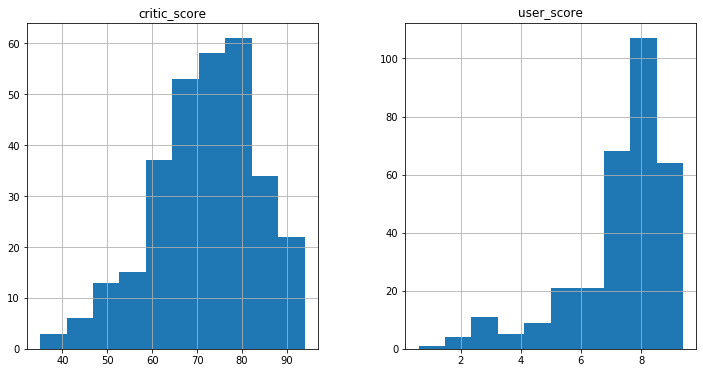

In [297]:
df[df['genre'] == 'Strategy'].hist(column = ['critic_score','user_score'], figsize=(12, 6))
plt.show()

Мнение критиков более неоднозначное: большинство оценок в диапазоне 65-82. Тогда как в пользовательском рейтинге наблюдается уверенный пик в области 8. Оба графика демонстрируют скошенность влево.

## Проверка гипотез  ##

**Тестируемая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не одинаковы.

alpha = 0.05 - общепринятое пороговое значение, равное 5%.

In [298]:
pc = df[df['platform'] == 'PC']['user_score'].dropna()
xone = df[df['platform'] == 'XOne']['user_score'].dropna()
st.ttest_ind(pc, xone).pvalue

1.3896435533548819e-05

Полученное значение p-value < alpha. Мы не можем отклонить нулевую гипотезу. Вероятность получить такое различие между средними близка к нулю.

**Тестируемая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.**

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковы.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не одинаковы.

alpha = 0.05 - общепринятое пороговое значение, равное 5%.

In [299]:
action = df[df['genre'] == 'Action']['user_score'].dropna()
sports = df[df['genre'] == 'Sports']['user_score'].dropna()
st.ttest_ind(action, sports).pvalue

0.10406951359049141

Полученное значение p-value говорит о том, что с вероятностью 10% такое или большее различие можно получить случайно. Отклоняем нулевую и принимаем альтернативную гипотезу.

## Выводы  ##

Целью работы было выявить определяющие успешность игры закономерности. В результате проведенного анализа были получены следующие выводы.
1. Среднее "время жизни" популярной платформы на рынке - около 10 лет.
2. Оценки критиков больше влияют на суммарные продажи, чем оценки пользователей. При этом у набирающих популярность платформ прослеживается более выраженная корреляция продаж и оценок пользователей и критиков, чем у теряющих популярность платформ. 
3. Популярные жанры: Action, Sports, Shooter. 
4. Жанры-аутсайдеры: Puzzle, Adventure, Strategy. Разница продаж между самым популярным и самым маловостребованным жанром составляет 10 раз.
5. Самые большие суммарные продажи в Северной Америке. На втором месте Европа. На третьем - Япония.
6. Популярные платформы. Первые 4 позиции в рейтингах по Северной Америке и Европе занимают одни и те же платформы (но на разных местах в рейтинге): PS2, PS3, X360, Wii. На 5 месте в Северной Америке платформа DS, в Европе - платформа PS. В Японии ведущие места в рейтинге продаж занимают платформы DS и PS. На третьем месте - PS2, популярная также в Европе и Северной Америке. На 4 и 5 местах - платформы SNES и 3DS, которые не попали в топ-5 на североамериканском и европейском рынках. Основной вклад в продажи игр на платформе SNES дает Япония. Таким образом, популярные платформы практически совпадают у европейских и североамериканских пользователей, и заметно отличаются у пользователей из Японии.
7. Популярность жанров по регионам. Жанры Action, Sports, Misc популярны во всех трех регионах. Рынки Северной Америки и Европы отличаются только 4 позицией: в Северной Америке это Platform, в Европе - Racing. Жанр Platform востребован в Северной Америке и Японии, жанр Racing - в Европе. В Японии рейтинг возглавляют ролевые игры, тогда как в Северной Америке и Европе этот жанр не вошел в топ-5.
8. Популярность игр по рейтингу ESRB. Во всех трех регионах популярны игры с рейтингами E, T, M, E10+, и малые продажи у игр с остальными рейтингами.
9. Самые распространенные оценки критиков в жанрах Role-Playing, Platform, Racing, Fighting, Adventure ниже, чем самые распространенные оценки пользователей. 
10. Сравнивать средние рейтинги по различным группам (например, жанрам, платформам) можно с помощью методики, протестированной в разделе Проверка гипотез. Так, например, для уровня значимости 5% была принята нулевая гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы и альтернативная гипотеза, что различие средних пользовательских рейтингов между жанрами Action и Sports можно получить случайно. 